#  <center> Pandas -- Extra

In [1]:
#Importing library
import pandas as pd
%matplotlib inline
import numpy as np
from numpy.random import randn
np.random.seed(101)

# Reading HTML and SQL 
** **HTML** Pandas read_html function will read tables off of a webpage and return a list of DataFrame objects:
** You may need to install htmllib5,lxml, and BeautifulSoup4. In your terminal/command prompt run:

    conda install lxml
    conda install html5lib
    conda install BeautifulSoup4

Then restart Jupyter Notebook.
(or use pip install if you aren't using the Anaconda Distribution)

Pandas can read table tabs off of html. For example:

In [2]:
#df = pd.read_html('http://www.fdic.gov/bank/individual/failed/banklist.html')

** **SQL** The pandas.io.sql module provides a collection of query wrappers to both facilitate data retrieval and to reduce dependency on DB-specific API. Database abstraction is provided by SQLAlchemy if installed. In addition you will need a driver library for your database. Examples of such drivers are psycopg2 for PostgreSQL or pymysql for MySQL. For SQLite this is included in Python’s standard library by default. You can find an overview of supported drivers for each SQL dialect in the SQLAlchemy docs.


If SQLAlchemy is not installed, a fallback is only provided for sqlite (and for mysql for backwards compatibility, but this is deprecated and will be removed in a future version). This mode requires a Python database adapter which respect the Python DB-API.

See also some cookbook examples for some advanced strategies.

The key functions are:

* read_sql_table(table_name, con[, schema, ...])	
    * Read SQL database table into a DataFrame.
* read_sql_query(sql, con[, index_col, ...])	
    * Read SQL query into a DataFrame.
* read_sql(sql, con[, index_col, ...])	
    * Read SQL query or database table into a DataFrame.
* DataFrame.to_sql(name, con[, flavor, ...])	
    * Write records stored in a DataFrame to a SQL database.

In [3]:
#from sqlalchemy import create_engine
#engine = create_engine('sqlite:///:memory:')
#df.to_sql('data', engine)
#sql_df = pd.read_sql('data',con=engine)

# Multi-Index and Index Hierarchy

Let us go over how to work with Multi-Index, first we'll create a quick example of what a Multi-Indexed DataFrame would look like:

In [4]:
# Index Levels
outside = ['G1','G1','G1','G2','G2','G2']
inside = [1,2,3,1,2,3]
hier_index = list(zip(outside,inside))
hier_index = pd.MultiIndex.from_tuples(hier_index)

In [5]:
hier_index

MultiIndex([('G1', 1),
            ('G1', 2),
            ('G1', 3),
            ('G2', 1),
            ('G2', 2),
            ('G2', 3)],
           )

In [6]:
df = pd.DataFrame(np.random.randn(6,2),index=hier_index,columns=['A','B'])
df

A         B
G1 1  2.706850  0.628133
   2  0.907969  0.503826
   3  0.651118 -0.319318
G2 1 -0.848077  0.605965
   2 -2.018168  0.740122
   3  0.528813 -0.589001

Now let's show how to index this! For index hierarchy we use df.loc[], if this was on the columns axis, you would just use normal bracket notation df[]. Calling one level of the index returns the sub-dataframe:

In [7]:
df.loc['G1']

,A,B
1,2.706850,0.628133
2,0.907969,0.503826
3,0.651118,-0.319318


In [8]:
df.loc['G1'].loc[1]

A    2.706850
B    0.628133
Name: 1, dtype: float64

In [9]:
df.index.names

FrozenList([None, None])

In [10]:
df.index.names = ['Group','Num']

In [11]:
df

A         B
Group Num                    
G1    1    2.706850  0.628133
      2    0.907969  0.503826
      3    0.651118 -0.319318
G2    1   -0.848077  0.605965
      2   -2.018168  0.740122
      3    0.528813 -0.589001

In [12]:
df.xs('G1')

,A,B
Num,,
1,2.706850,0.628133
2,0.907969,0.503826
3,0.651118,-0.319318


## Pandas Built-in Data Visualization

Pandas built-in capabilities for data visualization! It's built off of matplotlib, but it's baked into pandas for easier usage!

For more information on the following topics visit https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html<br>
For a nice graphic showing the anatomy of a figure with terminology, visit https://matplotlib.org/faq/usage_faq.html



<div class="alert alert-info"><strong>NOTE:</strong><tt><font color=black>&emsp;%matplotlib inline</font></tt> is specific to jupyter notebooks. It allows plots to appear inside the notebook.<br>Note that we are <em>not</em> importing matplotlib here, all of our plots are coming out of pandas.</div>

# Plot Types

There are several plot types built into pandas; most of them are statistical by nature:

<pre>
df.plot.hist()     histogram
df.plot.bar()      bar chart
df.plot.barh()     horizontal bar chart
df.plot.line()     line chart
df.plot.area()     area chart
df.plot.scatter()  scatter plot
df.plot.box()      box plot
df.plot.kde()      kde plot
df.plot.hexbin()   hexagonal bin plot
df.plot.pie()      pie chart</pre>

You can also call specific plots by passing their name as an argument, as with `df.plot(kind='area')`.


In [13]:
df1 = pd.read_csv('inputs/df1.csv', index_col=0)
df2 = pd.read_csv('inputs/df2.csv')

## Histograms
This is one of the most commonly used plots. Histograms describe the distribution of continuous data by dividing the data into "bins" of equal width, and plotting the number of values that fall into each bin. <a href='https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.hist.html'>[reference]</a>

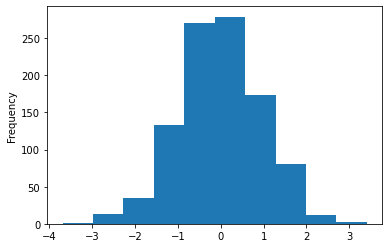

In [14]:
df1['A'].plot.hist();

We can add settings to do things like bring the x- and y-axis values to the edge of the graph, and insert lines between vertical bins:

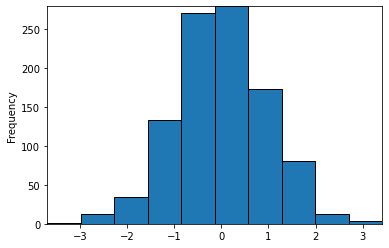

In [15]:
df1['A'].plot.hist(edgecolor='k').autoscale(enable=True, axis='both', tight=True)

You can use any [matplotlib color spec](https://matplotlib.org/api/colors_api.html) for **edgecolor**, such as `'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'`, or the string representation of a float value for shades of grey, such as `'0.5'`

For **autoscale** the axis can be set to `'x'`, `'y'` or `'both'`

We can also change the number of bins (the range of values over which frequencies are calculated) from the default value of 10:

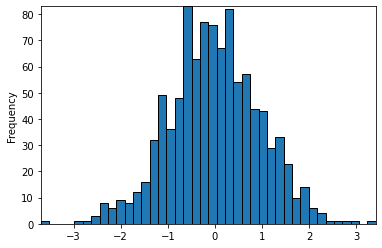

In [16]:
df1['A'].plot.hist(bins=40, edgecolor='k').autoscale(enable=True, axis='both', tight=True)

## Barplots
Barplots are similar to histograms, except that they deal with discrete data, and often reflect multiple variables. <a href='https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.bar.html'>[reference]</a>

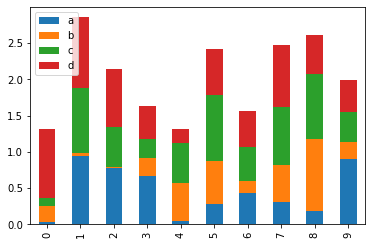

In [17]:
df2.plot.bar(stacked=True);

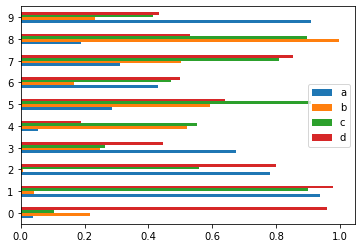

In [18]:
# USE .barh() TO DISPLAY A HORIZONTAL BAR PLOT
df2.plot.barh();

## Line Plots
Line plots are used to compare two or more variables. By default the x-axis values are taken from the index. <a href='https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.line.html'>[reference]</a>

Line plots happen to be the default pandas plot. They are accessible through <tt>df.plot()</tt> as well as <tt>df.plot.line()</tt>

<table style="display: inline-block">
    <tr><th>PROPERTY</th><th>CODE</th><th>VALUE</th><th>EFFECT</th></tr>
    <tr><td>linestyle</td><td><tt>ls</tt></td><td><tt>'-'</tt></td><td>solid line (default)</td></tr>
    <tr><td>linestyle</td><td><tt>ls</tt></td><td><tt>'--'</tt></td><td>dashed line</td></tr>
    <tr><td>linestyle</td><td><tt>ls</tt></td><td><tt>'-.'</tt></td><td>dashed/dotted line</td></tr>
    <tr><td>linestyle</td><td><tt>ls</tt></td><td><tt>':'</tt></td><td>dotted line</td></tr>
    <tr><td>color</td><td><tt>c</tt></td><td>string</td><td></td></tr>
    <tr><td>linewidth</td><td><tt>lw</tt></td><td>float</td><td></td></tr>
</table>

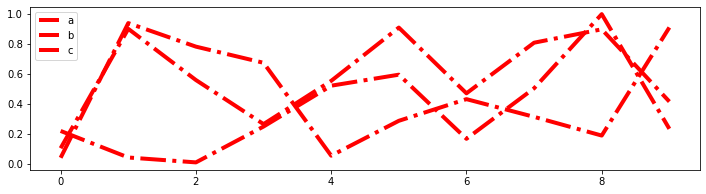

In [19]:
df2.plot.line(y=['a','b','c'],figsize=(12,3),ls='-.', c='r', lw='4');

### Object-oriented plotting

When we call <tt>df.plot()</tt>, pandas returns a <tt>matplotlib.axes.AxesSubplot</tt> object. We can set labels
on that object so long as we do it in the same jupyter cell. Setting an autoscale is done the same way.

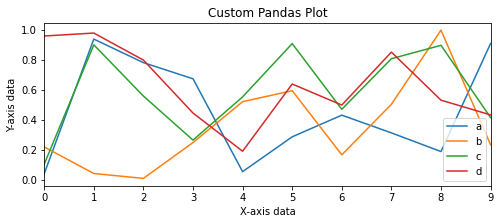

In [20]:
title='Custom Pandas Plot'
ylabel='Y-axis data'
xlabel='X-axis data'

ax = df2.plot(figsize=(8,3),title=title)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.autoscale(axis='x',tight=True);

## Plot Legend Placement
Pandas tries to optimize placement of the legend to reduce overlap on the plot itself. However, we can control the placement ourselves, and even place the legend outside of the plot. We do this through the <tt>.legend()</tt> method. <a href='https://matplotlib.org/api/_as_gen/matplotlib.pyplot.legend.html'>[reference]</a>

For starters we can pass a location code. <tt>.legend(loc=1)</tt> places the legend in the upper-right corner of the plot.<br>Alternatively we can pass a location string: <tt>.legend(loc='upper right')</tt> does the same thing.

<table style="display: inline-block">
<tr><th>LOCATION CODE</th><th>LOCATION STRING</th></tr>
<tr><td>0</td><td>'best'</td></tr>
<tr><td>1</td><td>'upper right'</td></tr>
<tr><td>2</td><td>'upper left'</td></tr>
<tr><td>3</td><td>'lower left'</td></tr>
<tr><td>4</td><td>'lower right'</td></tr>
<tr><td>5</td><td>'right'</td></tr>
<tr><td>6</td><td>'center left'</td></tr>
<tr><td>7</td><td>'center right'</td></tr>
<tr><td>8</td><td>'lower center'</td></tr>
<tr><td>9</td><td>'upper center'</td></tr>
<tr><td>10</td><td>'center'</td></tr>
</table>

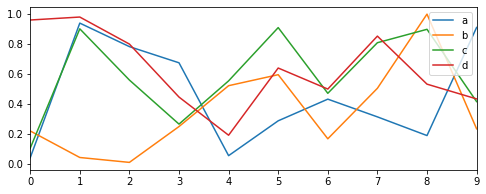

In [21]:
ax = df2.plot(figsize=(8,3))
ax.autoscale(axis='x',tight=True)
ax.legend(loc=1);

We can pass a second argument, <tt>bbox_to_anchor</tt> that treats the value passed in through <tt>loc</tt> as an anchor point, and positions the legend along the x and y axes based on a two-value tuple.

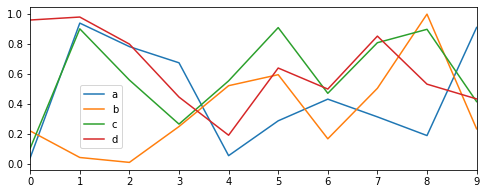

In [22]:
ax = df2.plot(figsize=(8,3))
ax.autoscale(axis='x',tight=True)
ax.legend(loc=3, bbox_to_anchor=(0.1,0.1));

### Placing the Legend Outside the Plot
In the above plot we passed <tt>(0.1,0.1)</tt> as our two-item tuple. This places the legend slightly to the right and slightly upward.<br>To place the legend outside the plot on the right-hand side, pass a value greater than or equal to 1 as the first item in the tuple.

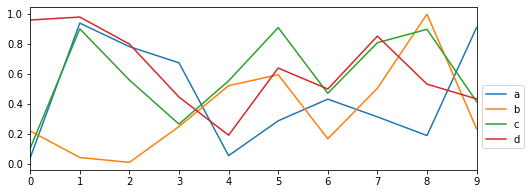

In [23]:
ax = df2.plot(figsize=(8,3))
ax.autoscale(axis='x',tight=True)
ax.legend(loc=3, bbox_to_anchor=(1.0,0.1));

## Area Plots
Area plots represent cumulatively stacked line plots where the space between lines is emphasized with colors. <a href='https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.area.html'>[reference]</a>

- To produce a blended area plot, pass a <strong>stacked=False</strong> argument
- It often helps to mute the colors by passing an <strong>alpha</strong> transparency value between 0 and 1.

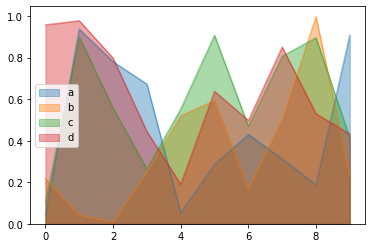

In [24]:
df2.plot.area(stacked=False, alpha=0.4);

## Scatter Plots
Scatter plots are a useful tool to quickly compare two variables, and to look for possible trends. <a href='https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.scatter.html'>[reference]</a>

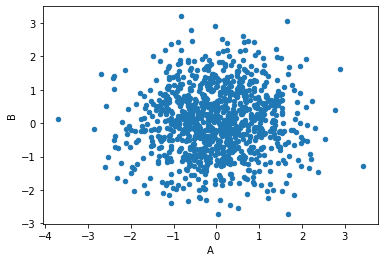

In [25]:
df1.plot.scatter(x='A',y='B');

### Scatter plots with colormaps
You can use <strong>c</strong> to color each marker based off another column value. Use `cmap` to indicate which colormap to use.<br>
For all the available colormaps, check out: http://matplotlib.org/users/colormaps.html

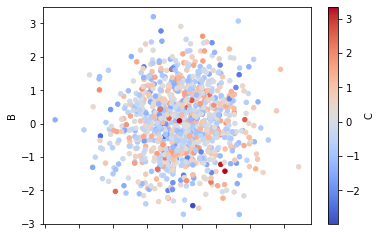

In [26]:
df1.plot.scatter(x='A',y='B',c='C',cmap='coolwarm');

### Scatter plots with sized markers
Alternatively you can use <strong>s</strong> to indicate marker size based off another column. The <strong>s</strong> parameter needs to be an array, not just the name of a column:

C:\Users\paras\miniconda3\envs\GEMS\lib\site-packages\matplotlib\collections.py:981: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


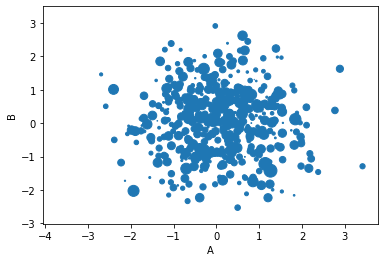

In [27]:
df1.plot.scatter(x='A',y='B',s=df1['C']*50);

The warning above appeared because some `df1['C']` values are negative. We can fix this finding the minimum value, writing a function that adds to each value, and applying our function to the data with <strong>.apply(func)</strong>.

Also, these data points have a lot of overlap. We can address this issue by passing in an <strong>alpha</strong> blending value between 0 and 1 to make markers more transparent.

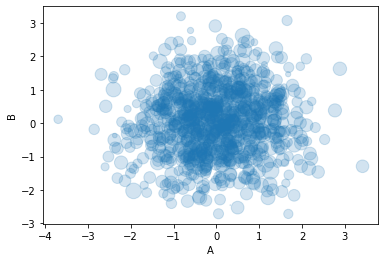

In [28]:
def add_three(val):
    return val+3

df1.plot.scatter(x='A',y='B',s=df1['C'].apply(add_three)*45, alpha=0.2);

## BoxPlots
Box plots, aka "box and whisker diagrams", describe the distribution of data by dividing data into <em>quartiles</em> about the mean.<br>
Look <a href='https://en.wikipedia.org/wiki/Box_plot'>here</a> for a description of boxplots. <a href='https://pandas.pydata.org/pandas-docs/stable/visualization.html#box-plots'>[reference]</a>

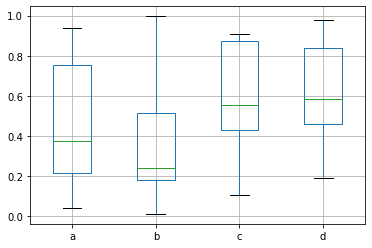

In [29]:
df2.boxplot();

### Boxplots with Groupby
To draw boxplots based on groups, first pass in a list of columns you want plotted (including the groupby column), then pass <strong>by='columname'</strong> into <tt>.boxplot()</tt>. Here we'll group records by the <strong>'e'</strong> column, and draw boxplots for the <strong>'b'</strong> column.

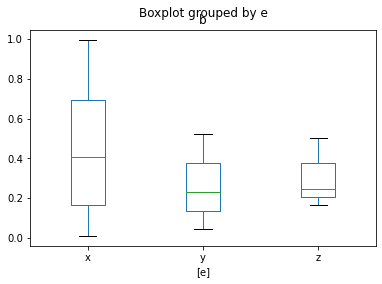

In [30]:
df2[['b','e']].boxplot(by='e', grid=False);

## Kernel Density Estimation (KDE) Plot
These plots are accessible either through <tt>df.plot.kde()</tt> or <tt>df.plot.density()</tt> <a href='https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.kde.html'>[reference]</a>

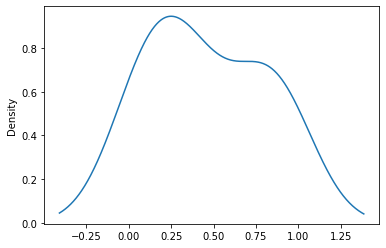

In [31]:
df2['a'].plot.kde();

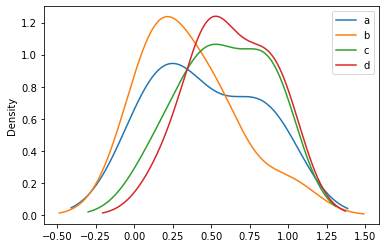

In [32]:
df2.plot.density();

## Hexagonal Bin Plot

Useful for Bivariate Data, alternative to scatterplot. <a href='https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.hexbin.html'>[reference]</a>

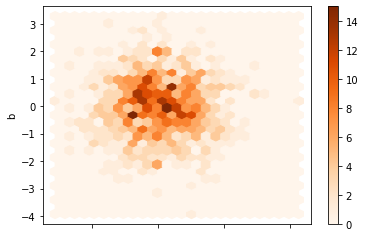

In [33]:
# FIRST CREATE A DATAFRAME OF RANDOM VALUES
df = pd.DataFrame(np.random.randn(1000, 2), columns=['a', 'b'])

# MAKE A HEXAGONAL BIN PLOT
df.plot.hexbin(x='a',y='b',gridsize=25,cmap='Oranges');

## Timeseries with Pandas
### Pandas Datetime Index
For more on the pandas DatetimeIndex visit https://pandas.pydata.org/pandas-docs/stable/timeseries.html

In [34]:
# THE WEEK OF JULY 8TH, 2018
idx = pd.date_range('7/8/2018', periods=7, freq='H')
idx

DatetimeIndex(['2018-07-08 00:00:00', '2018-07-08 01:00:00',
               '2018-07-08 02:00:00', '2018-07-08 03:00:00',
               '2018-07-08 04:00:00', '2018-07-08 05:00:00',
               '2018-07-08 06:00:00'],
              dtype='datetime64[ns]', freq='H')

Another way is to convert incoming text with the <tt><strong>pd.to_datetime()</strong></tt> method:

In [35]:
idx = pd.to_datetime(['Jan 01, 2018','1/2/18','03-Jan-2018',None])
idx

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', 'NaT'], dtype='datetime64[ns]', freq=None)

Using a unix epoch time

In [36]:
pd.to_datetime(1490195805, unit='s')

Timestamp('2017-03-22 15:16:45')

Using a non-unix epoch origin

In [37]:
pd.to_datetime([1, 2, 3], unit='D',
               origin=pd.Timestamp('2022-08-01'))


DatetimeIndex(['2022-08-02', '2022-08-03', '2022-08-04'], dtype='datetime64[ns]', freq=None)

A third way is to pass a list or an array of datetime objects into the <tt><strong>pd.DatetimeIndex()</strong></tt> method:

In [38]:
# Create a NumPy datetime array
some_dates = np.array(['2016-03-15', '2017-05-24', '2018-08-09'], dtype='datetime64[D]')
# Convert to an index
idx = pd.DatetimeIndex(some_dates)
idx

DatetimeIndex(['2016-03-15', '2017-05-24', '2018-08-09'], dtype='datetime64[ns]', freq=None)

In [39]:
data = np.random.randn(3,2)
cols = ['A','B']
df = pd.DataFrame(data,idx,cols)
df

,A,B
2016-03-15,0.551010,-0.610716
2017-05-24,-0.592845,-0.644391
2018-08-09,0.118266,2.170962


In [40]:
df.index.max()

Timestamp('2018-08-09 00:00:00')

In [41]:
df.index.min()

Timestamp('2016-03-15 00:00:00')

### `pd.DateOffset()` and `pd.Timedelta()` function

Let’s see how we can use the Pandas `pd.Timedelta()` function to add a constant number of days to a column:


In [42]:
df['14 hours later'] =df.index+ pd.Timedelta(days=14) 
df

,A,B,14 hours later
2016-03-15,0.551010,-0.610716,2016-03-29
2017-05-24,-0.592845,-0.644391,2017-06-07
2018-08-09,0.118266,2.170962,2018-08-23


In [43]:
df['14 days earlier'] = df.index - pd.DateOffset(days=14)
df

,A,B,14 hours later,14 days earlier
2016-03-15,0.551010,-0.610716,2016-03-29,2016-03-01
2017-05-24,-0.592845,-0.644391,2017-06-07,2017-05-10
2018-08-09,0.118266,2.170962,2018-08-23,2018-07-26


**Exercise:** for person `A-C` create a data frame with a hypotetical arrival date and lenght of stay then calculate their departure date and do it vice versa

In [44]:
arrival_date = np.array(['2016-03-15', '2016-05-24', '2016-08-09'], dtype='datetime64[D]')
# Convert to an index
idx = pd.DatetimeIndex(arrival_date)


In [45]:
data = pd.DataFrame({'Name':['A','B','C'],
       'Lenght of stay':[3,7,5],},
       index=idx)
data

,Name,Lenght of stay
2016-03-15,A,3
2016-05-24,B,7
2016-08-09,C,5


In [46]:
data['Departure date'] = data.index + pd.to_timedelta(data['Lenght of stay'], unit='D') 
data

,Name,Lenght of stay,Departure date
2016-03-15,A,3,2016-03-18
2016-05-24,B,7,2016-05-31
2016-08-09,C,5,2016-08-14


## Time Resampling
When calling `.resample()` you first need to pass in a **rule** parameter, then you need to call some sort of aggregation function.

The **rule** parameter describes the frequency with which to apply the aggregation function (daily, monthly, yearly, etc.)<br>
It is passed in using an "offset alias" - refer to the table below. [[reference](http://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases)]

The aggregation function is needed because, due to resampling, we need some sort of mathematical rule to join the rows (mean, sum, count, etc.)

Let's read a Tide Gauge data (Source: [NOAA](https://tidesandcurrents.noaa.gov/map/))

In [47]:
df = pd.read_csv('inputs/Tide.csv', index_col='Date', parse_dates=True) 

**parse_dates=True making sure it understands inde is datetime**

In [48]:
df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26648 entries, 2007-02-14 16:30:00 to 2010-02-28 23:30:00
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hs      26648 non-null  float64
 1   Hs_hat  26648 non-null  float64
dtypes: float64(2)
memory usage: 624.6 KB


In [49]:
df.index

DatetimeIndex(['2007-02-14 16:30:00', '2007-02-14 17:30:00',
               '2007-02-14 18:30:00', '2007-02-14 19:30:00',
               '2007-02-14 20:30:00', '2007-02-14 21:30:00',
               '2007-02-14 22:30:00', '2007-02-14 23:30:00',
               '2007-02-15 00:30:00', '2007-02-15 01:30:00',
               ...
               '2010-02-28 14:30:00', '2010-02-28 15:30:00',
               '2010-02-28 16:30:00', '2010-02-28 17:30:00',
               '2010-02-28 18:30:00', '2010-02-28 19:30:00',
               '2010-02-28 20:30:00', '2010-02-28 21:30:00',
               '2010-02-28 22:30:00', '2010-02-28 23:30:00'],
              dtype='datetime64[ns]', name='Date', length=26648, freq=None)

<table style="display: inline-block">
    <caption style="text-align: center"><strong>TIME SERIES OFFSET ALIASES</strong></caption>
<tr><th>ALIAS</th><th>DESCRIPTION</th></tr>
<tr><td>B</td><td>business day frequency</td></tr>
<tr><td>C</td><td>custom business day frequency (experimental)</td></tr>
<tr><td>D</td><td>calendar day frequency</td></tr>
<tr><td>W</td><td>weekly frequency</td></tr>
<tr><td>M</td><td>month end frequency</td></tr>
<tr><td>SM</td><td>semi-month end frequency (15th and end of month)</td></tr>
<tr><td>BM</td><td>business month end frequency</td></tr>
<tr><td>CBM</td><td>custom business month end frequency</td></tr>
<tr><td>MS</td><td>month start frequency</td></tr>
<tr><td>SMS</td><td>semi-month start frequency (1st and 15th)</td></tr>
<tr><td>BMS</td><td>business month start frequency</td></tr>
<tr><td>CBMS</td><td>custom business month start frequency</td></tr>
<tr><td>Q</td><td>quarter end frequency</td></tr>
<tr><td></td><td><font color=white>intentionally left blank</font></td></tr></table>

<table style="display: inline-block; margin-left: 40px">
<caption style="text-align: center"></caption>
<tr><th>ALIAS</th><th>DESCRIPTION</th></tr>
<tr><td>BQ</td><td>business quarter endfrequency</td></tr>
<tr><td>QS</td><td>quarter start frequency</td></tr>
<tr><td>BQS</td><td>business quarter start frequency</td></tr>
<tr><td>A</td><td>year end frequency</td></tr>
<tr><td>BA</td><td>business year end frequency</td></tr>
<tr><td>AS</td><td>year start frequency</td></tr>
<tr><td>BAS</td><td>business year start frequency</td></tr>
<tr><td>BH</td><td>business hour frequency</td></tr>
<tr><td>H</td><td>hourly frequency</td></tr>
<tr><td>T, min</td><td>minutely frequency</td></tr>
<tr><td>S</td><td>secondly frequency</td></tr>
<tr><td>L, ms</td><td>milliseconds</td></tr>
<tr><td>U, us</td><td>microseconds</td></tr>
<tr><td>N</td><td>nanoseconds</td></tr></table>    

In [50]:
# daily >> yearly (we can use mean, max, ... or use our own function)
def first_day(entry):
    if len(entry):
        return entry[0]
df.resample(rule='A').apply(first_day) #.mean

,Hs,Hs_hat
Date,,
2007-12-31,0.94,0.282
2008-12-31,0.35,0.105
2009-12-31,0.20,0.060
2010-12-31,0.27,0.081


<AxesSubplot:xlabel='Date'>

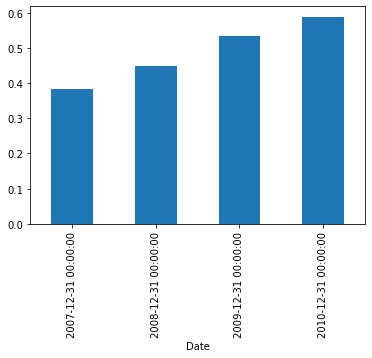

In [51]:
df['Hs'].resample(rule='A').mean().plot.bar()

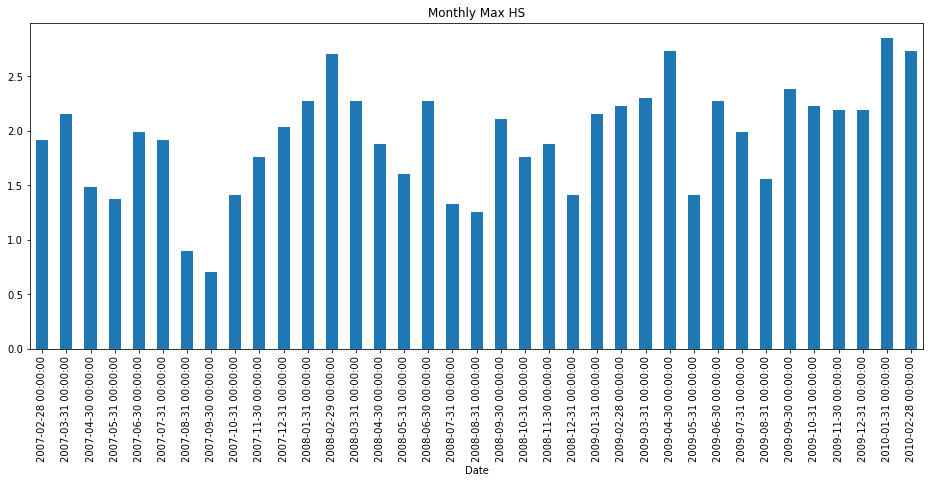

In [52]:
title = 'Monthly Max HS'
df['Hs'].resample('M').max().plot.bar(figsize=(16,6), title=title,color='#1f77b4');

## Time Shifting
Sometimes you may need to shift all your data up or down along the time series index. In fact, a lot of pandas built-in methods do this under the hood. This isn't something we'll do often in the course, but it's definitely good to know about this anyways!

In [53]:
df.shift(1).head() # we can use fill_value to assign a number instead of NaN

,Hs,Hs_hat
Date,,
2007-02-14 16:30:00,NaN,NaN
2007-02-14 17:30:00,0.94,0.282
2007-02-14 18:30:00,0.16,0.048
2007-02-14 19:30:00,0.20,0.060
2007-02-14 20:30:00,0.23,0.069


In [54]:
# NOTE: You will lose that last piece of data that no longer has an index!
df.shift(1).tail()

,Hs,Hs_hat
Date,,
2010-02-28 19:30:00,1.05,0.315
2010-02-28 20:30:00,1.29,0.387
2010-02-28 21:30:00,1.13,0.339
2010-02-28 22:30:00,1.05,0.315
2010-02-28 23:30:00,1.17,0.351


## Shifting based on Time Series Frequency Code

We can choose to shift <em>index values</em> up or down without realigning the data by passing in a <strong>freq</strong> argument.<br>


In [55]:
# Shift everything forward one month
df.shift(periods=1, freq='M').head()

,Hs,Hs_hat
Date,,
2007-02-28 16:30:00,0.94,0.282
2007-02-28 17:30:00,0.16,0.048
2007-02-28 18:30:00,0.20,0.060
2007-02-28 19:30:00,0.23,0.069
2007-02-28 20:30:00,0.23,0.069


## Rolling

A common process with time series is to create data based off of a rolling mean. The idea is to divide the data into "windows" of time, and then calculate an aggregate function for each window. In this way we obtain a <em>simple moving average</em>. Let's show how to do this easily with pandas!

In [56]:
# 7 day rolling mean
df.rolling(window=7).mean().head(15)

,Hs,Hs_hat
Date,,
2007-02-14 16:30:00,NaN,NaN
2007-02-14 17:30:00,NaN,NaN
2007-02-14 18:30:00,NaN,NaN
2007-02-14 19:30:00,NaN,NaN
2007-02-14 20:30:00,NaN,NaN
2007-02-14 21:30:00,NaN,NaN
2007-02-14 22:30:00,0.362857,0.108857
2007-02-14 23:30:00,0.290000,0.087000
2007-02-15 00:30:00,0.345714,0.103714


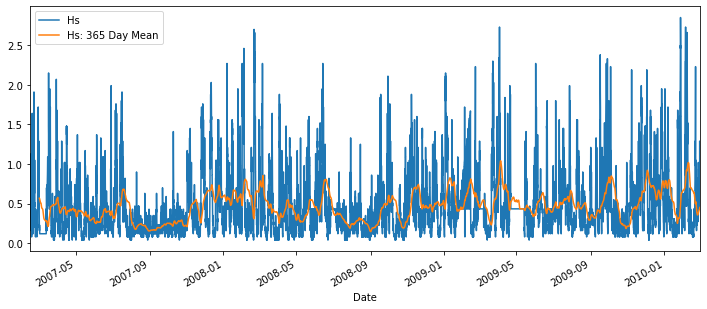

In [57]:
df['Hs: 365 Day Mean'] = df['Hs'].rolling(window=365).mean()
df[['Hs','Hs: 365 Day Mean']].plot(figsize=(12,5)).autoscale(axis='x',tight=True);

## Expanding

Instead of calculating values for a rolling window of dates, what if you wanted to take into account everything from the start of the time series up to each point in time? For example, instead of considering the average over the last 7 days, we would consider all prior data in our expanding set of averages.

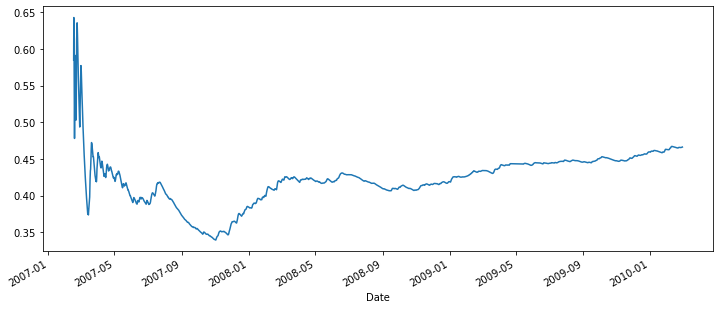

In [58]:
# Optional: specify a minimum number of periods to start from
df['Hs'].expanding(min_periods=30).mean().plot(figsize=(12,5));